[DataSet](Traffic Sign.ipynb)

In [1]:
import sys
import os
import skimage.data
import skimage.transform
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Allow image embeding in notebook
%matplotlib inline

In [2]:
from skimage import feature

In [3]:
base_dir = '/home/hyungjunkim/repo/db/traffic/datasets/'

In [4]:
train_in_dir = base_dir + 'BelgiumTS/Training/'
test_in_dir = base_dir + 'BelgiumTS/Testing/'

In [5]:
train_out_dir = base_dir +'BelgiumTS_T/Training/'
test_out_dir = base_dir +'BelgiumTS_T/Testing/'
inf_in_dir = base_dir +'BelgiumTS_T/Inference/in/'
inf_out_dir = base_dir +'BelgiumTS_T/Inference/out/'

In [6]:
os.makedirs(train_out_dir, exist_ok=True)
os.makedirs(test_out_dir, exist_ok=True)
os.makedirs(inf_in_dir, exist_ok=True)
os.makedirs(inf_out_dir, exist_ok=True)

In [7]:
import sys
import pdb
class DetectEdges():
    def __init__(self, train_in_dir, test_in_dir, train_out_dir, test_out_dir, inf_out_dir, size=64, show_idx=None):
        self.train_dir = {'in':train_in_dir, 'out':train_out_dir}
        self.test_dir =  {'in':test_in_dir, 'out':test_out_dir}
        self.inf_out_dir = inf_out_dir
        self.size = size
        self.show_idx = show_idx
        self.nrow = len(show_idx)
        self.ncol = 2
        
    def showImage(out):
        plt.figure()
        plt.imshow(out)
        plt.axis('off')
        
    def convDatum(self, datum, idx):
        import cv2
        _img = cv2.imread(datum)
        _img = cv2.resize(_img, (self.size, self.size))
        img = cv2.cvtColor(_img, cv2.COLOR_BGR2RGB)
        filter = cv2.Canny(img, 50, 300)
        _out = cv2.cvtColor(filter, cv2.COLOR_GRAY2RGB)
        #_out = cv2.bitwise_not(_out) # black > white & white > black
        out = np.concatenate((_img, _out), axis=1)
        if idx in self.show_idx:
            DetectEdges.showImage(np.concatenate((img, _out), axis=1))
            
        return _out, out
        
    def convData(self):
        data_dirs = [self.train_dir, self.test_dir]
        idx = 0
        inf_out_dir = self.inf_out_dir
        for dirs in data_dirs:
            data_dir = dirs['in']
            save_dir = dirs['out']
            
            directories = [d for d in os.listdir(data_dir) 
                           if os.path.isdir(os.path.join(data_dir, d))]
            directories.sort()
            
            labels = []
            images = []
            
            for d in directories:
                label_dir = os.path.join(data_dir, d)
                file_names = [os.path.join(label_dir, f) 
                              for f in os.listdir(label_dir) 
                              if f.endswith(".ppm")]
                for f in file_names:
                    in_f, out_f = DetectEdges.convDatum(self, f, idx)
                    f_in, f_out = os.path.split(f)
                    label_in, label_out = os.path.split(f_in)
                    os.makedirs('{}/{}'.format(save_dir, label_out), exist_ok=True)
                    cv2.imwrite('{}/{}/{}'.format(save_dir, label_out, f_out), out_f)
                    os.makedirs('{}/{}'.format(inf_out_dir, label_out), exist_ok=True)
                    cv2.imwrite('{}/{}/{}'.format(inf_out_dir, label_out, f_out), in_f)
                    #sys.exit('test')
                    idx += 1

In [8]:
run = DetectEdges(train_in_dir, test_in_dir, train_out_dir, test_out_dir, inf_out_dir, 256, [0, 151, 353, 501])

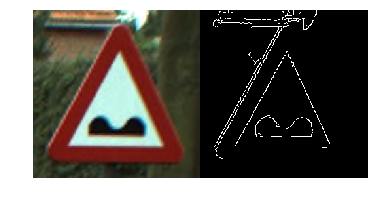

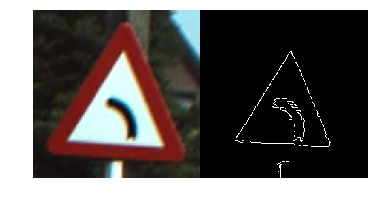

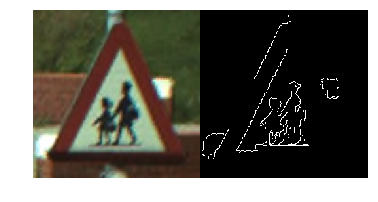

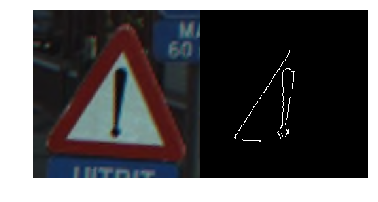

In [9]:
run.convData()